In [3]:
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/4043472463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_new['year'] = pd.to_numeric(douglas_data_new['year'])
/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/4043472463.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_new['births'] = pd.to_numeric(douglas_data_new['births'])


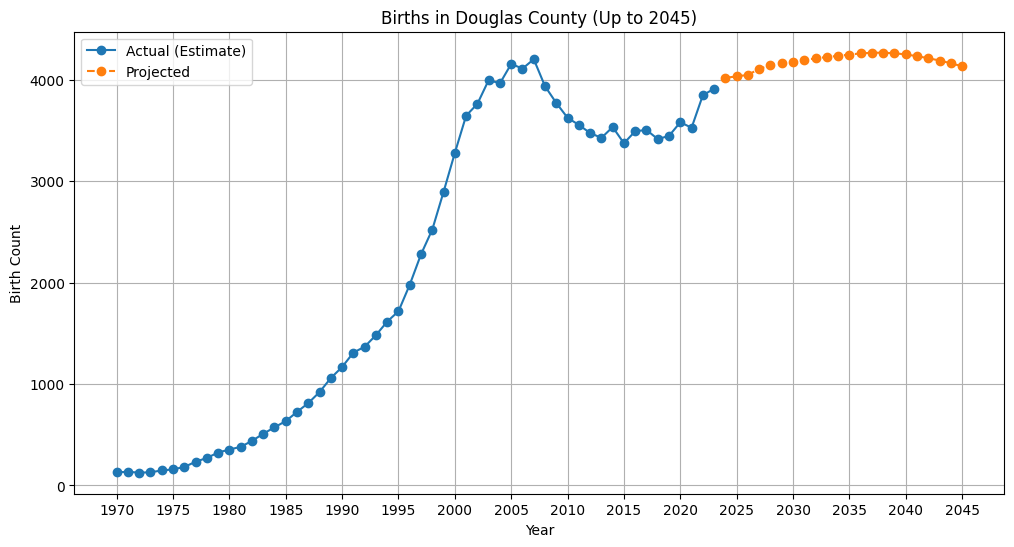

In [18]:
# Load the new CSV file
new_file_path = 'components-change-county.csv'
df = pd.read_csv(new_file_path)

# Filter data for Douglas County (FIPS code: 35)
douglas_data_new = df[df['countyfips'] == 35]

# Convert year and births to numeric
douglas_data_new['year'] = pd.to_numeric(douglas_data_new['year'])
douglas_data_new['births'] = pd.to_numeric(douglas_data_new['births'])

# Filter data up to 2045
douglas_data_new = douglas_data_new[douglas_data_new['year'] <= 2045]

# Separate actual estimates and projections
actual_data_new = douglas_data_new[douglas_data_new['datatype'] == 'Estimate']
projected_data_new = douglas_data_new[douglas_data_new['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_new['year'], actual_data_new['births'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_new['year'], projected_data_new['births'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Births in Douglas County (Up to 2045)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(min(douglas_data_new['year']), 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


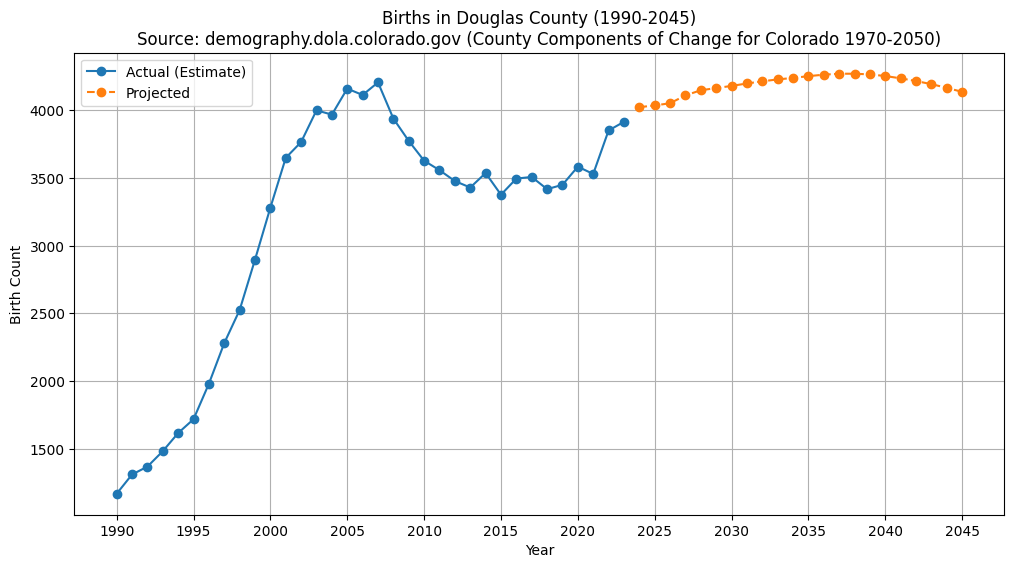

In [15]:
# Filter data from 1990 onwards
douglas_data_1990 = douglas_data_new[douglas_data_new['year'] >= 1990]

# Separate actual estimates and projections for post-1990 data
actual_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Estimate']
projected_data_1990 = douglas_data_1990[douglas_data_1990['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_1990['year'], actual_data_1990['births'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_1990['year'], projected_data_1990['births'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Births in Douglas County (1990-2045)\nSource: demography.dola.colorado.gov (County Components of Change for Colorado 1970-2050)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(1990, 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [23]:
# Get unique county codes from the CSV file
df = pd.read_csv(new_file_path)
# Get unique pairs of countyfips and countyname
unique_counties = df[['countyfips', 'countyname']].drop_duplicates()
print("County FIPS codes and their corresponding names:")
print(unique_counties.sort_values('countyfips'))

# Create a dictionary mapping county names to FIPS codes
counties_of_interest = ['Arapahoe', 'Elbert', 'El Paso', 'Jefferson', 'Teller', 'Denver', 'Douglas']
fips_lookup = unique_counties[unique_counties['countyname'].isin(counties_of_interest)]
print("\nFIPS codes for counties of interest:")
print(fips_lookup.sort_values('countyname'))



County FIPS codes and their corresponding names:
    countyfips  countyname
0            0    Colorado
1            1       Adams
2            3     Alamosa
3            5    Arapahoe
4            7   Archuleta
..         ...         ...
59         117      Summit
60         119      Teller
61         121  Washington
62         123        Weld
63         125        Yuma

[65 rows x 2 columns]

FIPS codes for counties of interest:
    countyfips countyname
3            5   Arapahoe
16          31     Denver
18          35    Douglas
21          41    El Paso
20          39     Elbert
30          59  Jefferson
60         119     Teller


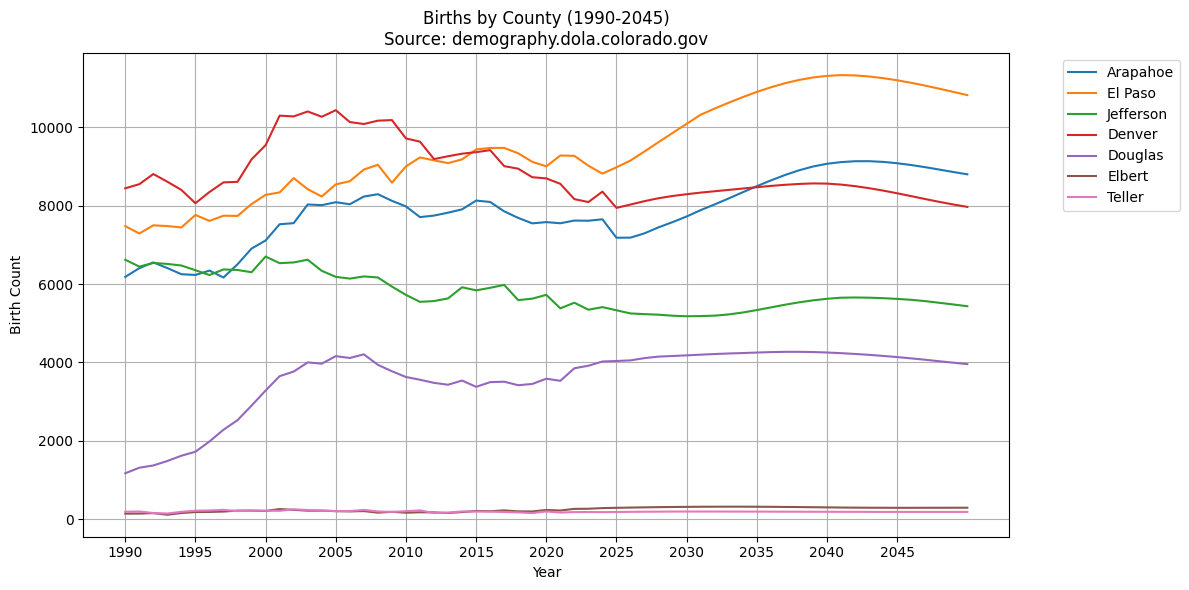

In [38]:
# Get data for specified counties
counties = ['Arapahoe', 'El Paso', 'Jefferson', 'Denver', 'Douglas', 'Elbert', 'Teller']
county_data = {}

df = pd.read_csv(new_file_path)

for county in counties:
    county_data[county] = df[df['countyname'] == county]

plt.figure(figsize=(12, 6))

# Plot data for each county
for county in counties:
    county_df = county_data[county]
    
    # Filter data from 1990 onwards
    county_df_1990 = county_df[county_df['year'] >= 1990]
    
    # Plot data with solid line
    plt.plot(county_df_1990['year'], county_df_1990['births'], label=county)

# Customize the plot
plt.title('Births by County (1990-2045)\nSource: demography.dola.colorado.gov')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(1990, 2046, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


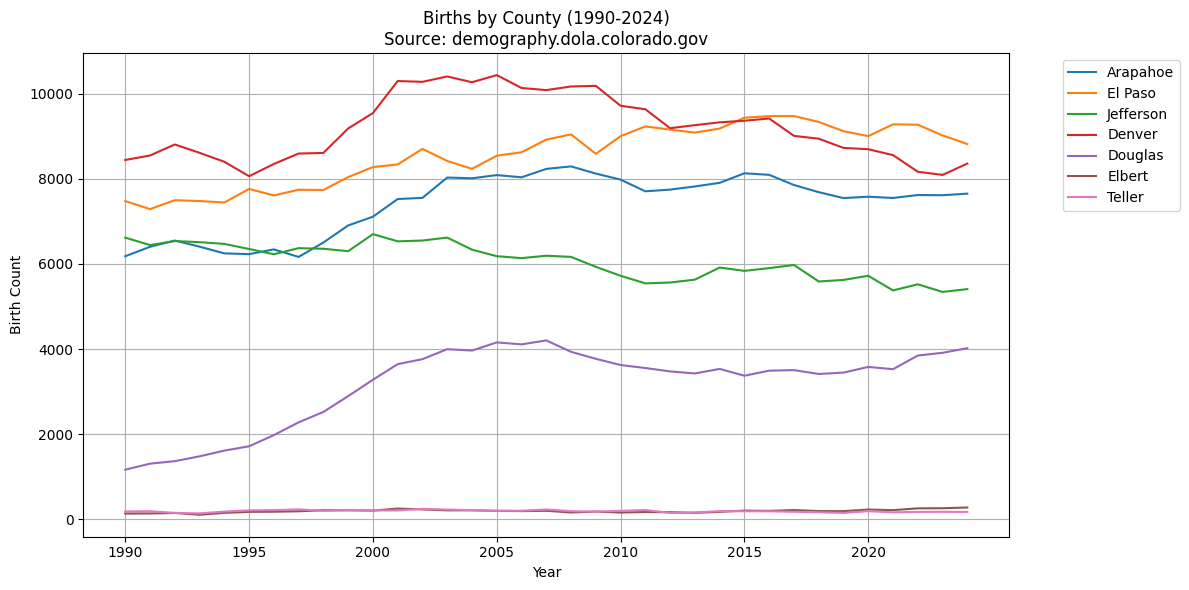

In [39]:
# Get data for specified counties
counties = ['Arapahoe', 'El Paso', 'Jefferson', 'Denver', 'Douglas', 'Elbert', 'Teller']
county_data = {}

df = pd.read_csv(new_file_path)

for county in counties:
    county_data[county] = df[df['countyname'] == county]

plt.figure(figsize=(12, 6))

# Plot data for each county
for county in counties:
    county_df = county_data[county]
    
    # Filter data from 1990 onwards and exclude projections
    county_df_filtered = county_df[(county_df['year'] >= 1990) & (county_df['year'] <= 2024)]
    
    # Plot data with solid line
    plt.plot(county_df_filtered['year'], county_df_filtered['births'], label=county)

# Customize the plot
plt.title('Births by County (1990-2024)\nSource: demography.dola.colorado.gov')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(1990, 2024, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()